### APRENDIZAJE PROFUNDO PARA PROCESAMIENTO DE INFORMACIÓN BIOMÉTRICA

# PRÁCTICA 1
### GRUPO 
* Hajar Boulehdid
* Sofía Santos Schmick
* Andrés Teruel Fernández

---


El primer paso es poner a punto el sistema para garantizar el correcto funcionamiento de la práctica. Para ello, es necesario crear un nuevo entorno con las siguientes versiones de librerías:
* Keras: 2.10.0
* Keras-Processing: 1.1.2
* TensorFlow: 2.10.1
* OpenCV: 4.10.0
* NumPy: 1.26.4

Una vez configurado el entorno con estas versiones, se procede a ejecutar el archivo face_recognition_main, en el cual se importan todas las librerías y funciones necesarias para el desarrollo de esta práctica.

In [1]:
import os

# Remove most annoying tensorflow warnings
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from hajar_face_recognition_main import *

C:\Users\hajar\anaconda3\envs\biometria\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.5 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


---

## CARGA DE LOS DATOS.


In [2]:
embeddings_10_ppl_dataset, main_embeddings_dataset = load_datasets()

Embeddings dataset already exists. Loading...
Embeddings dataset already exists. Loading...
Embeddings datasets loaded.


---

## TAREA 1.0:

 - Revisa y entiende el código
 - Compara con la imagen 2 o 3 con las anterires.

In [3]:
"""Comparamos si son la misma persona a través de una simple.Detectamos las caras de las imagenes."""
images_dir = os.path.join('..', 'data', 'imagenes')
images = [os.path.join(images_dir, f"{i}.jpg") for i in range(4)]

for i in range(len(images)):
    for j in range(i + 1, len(images)):
        image1 = images[i]
        image2 = images[j]
        
        print(f"Image {i} vs image {j}: ", end='')
        compare_images(image1, image2)

Image 0 vs image 1: Las imágenes pertenecen a la misma persona con similitud 0.61
Image 0 vs image 2: Las imágenes pertenecen a diferentes personas con similitud 0.33
Image 0 vs image 3: Las imágenes pertenecen a diferentes personas con similitud 0.36
Image 1 vs image 2: Las imágenes pertenecen a diferentes personas con similitud 0.38
Image 1 vs image 3: Las imágenes pertenecen a diferentes personas con similitud 0.24
Image 2 vs image 3: Las imágenes pertenecen a diferentes personas con similitud 0.21


---

## TAREA 1.1: 

 - Generate a small database with a minimum of 3 images per person and 10 persons.
 - Develop a script to calculate the FAR and FRR curves.   

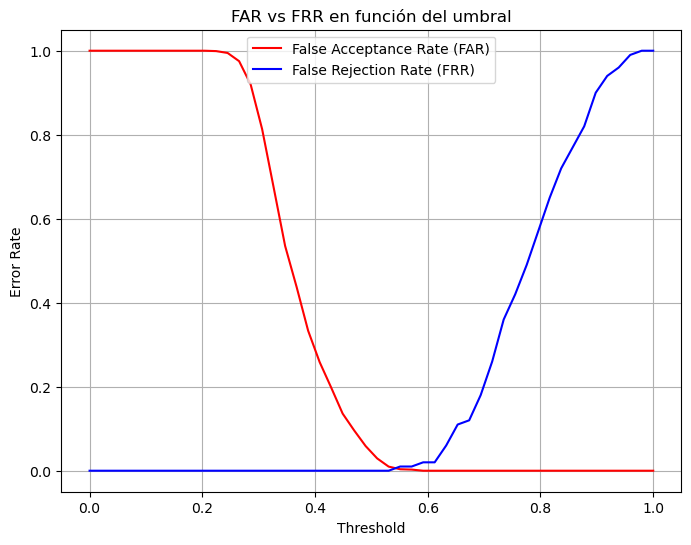

In [7]:
# Generar FAR, FRR y el gráfico
fars, frrs = calculate_far_frr_plot(embeddings_10_ppl_dataset)

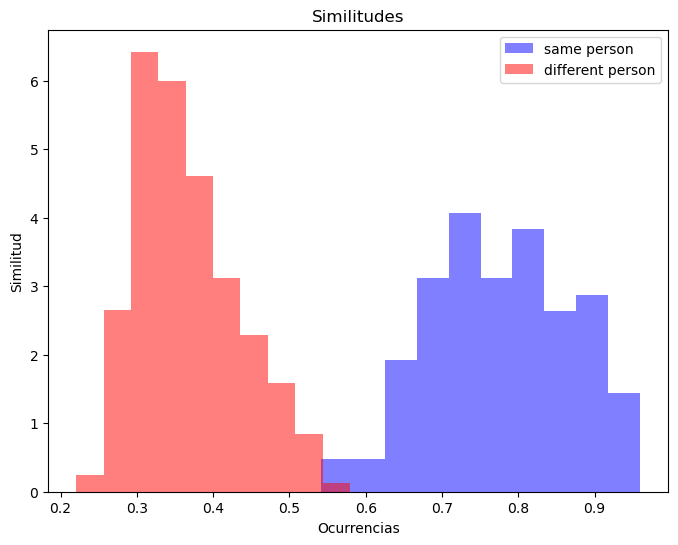

In [8]:
same_person, different_person = calcular_histograma_similitudes(embeddings_10_ppl_dataset)

Por hacer en este apartado:
- El profe decia que nos daba muy poco solape en FAR, FRR
- Si es que existe una función en python para FAR, probarla
- Explicar resultados
- El histograma daba bien?
- pintar los histogramas, ver qeu va ha haber solapamiento, histograma de los porpios scores.la distancia que le ha dado a la msima persona, distancia que les ha dado a personas iguales, y difernetes,
- pintar los histogramas de los scores de dsitancia dado la misma perosna
- Desarrollar esto que nos dijo el profe: Va a haber mas impostores que genuinos, por eso una montaña es mayor. Se 
compara uno mismo con muchos que no son él. 

---

## TAREA 1.2:

 - Read the DiveFace database and obtain the embeddings of 50 face images (1 image per subject) from the 6 demographic groups (50*6=300 embeddings in total).
 - DiveFace contains face images from 3 demographic groups (3 ethnicity and 2 gender)

In [9]:
# Llamar a la función para crear la base de datos de embeddings
embeddings_db_demographic = create_embeddings_subset(main_embeddings_dataset, 350)

# Verificar la cantidad de embeddings por grupo
for group_name, embeddings in embeddings_db_demographic.items():
    print(f"{group_name}: {len(embeddings)} embeddings")

MN4K_120: 350 embeddings
HN4K_120: 350 embeddings
MB4K_120: 350 embeddings
HB4K_120: 350 embeddings
HA4K_120: 350 embeddings
MA4K_120: 350 embeddings


---

## TAREA 1.3:

 - Using t-SNE, represent the embeddings and its demographic group. Can you differentiate the different demographic groups?
 

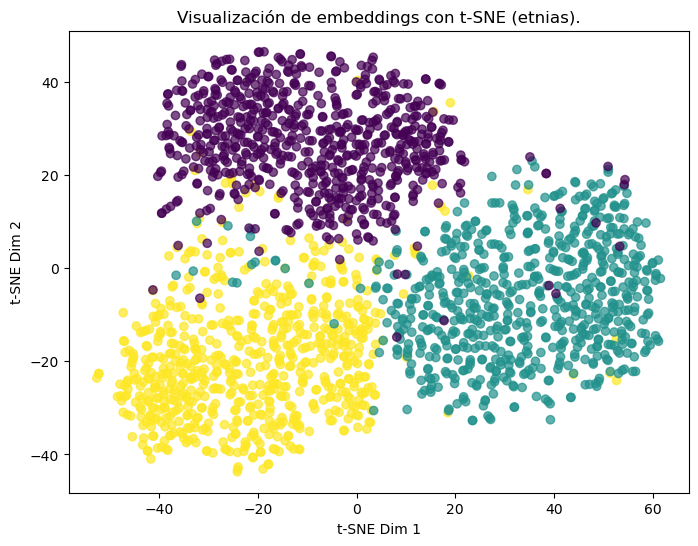

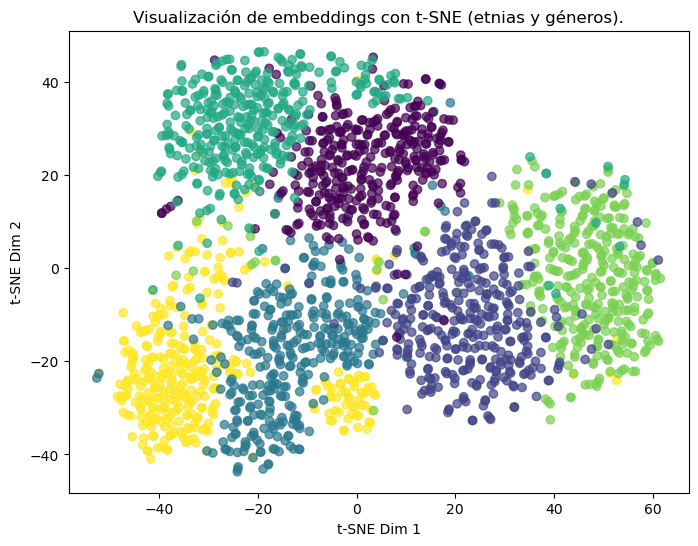

In [10]:
# Aplicar t-SNE a los embeddings
apply_tsne(embeddings_db_demographic)

---

## TAREA 2.1:
 * Train 3 different Gender Classifiers (previous Task 1.4) using images from same ethnic group: Model A (only Asian), Model B (only Black), Model C (only Caucasian).

El entrenamiento de los 3 modelos se ha llevado a cabo haciendo uso de 1000 embbedings de cada grupo étnico (500 por cada género). De la misma manera que se ha heco anteriormente, los embeddings se generan con el modelo `resnet50.h5`. 


En primer lugar, dividimos cada grupo de embeddings en un conjunto de train y otro de test haciendo uso de la función `generate_test_train`.

In [3]:
embeddings = divide_embeddings(main_embeddings_dataset)

for key, subset in embeddings.items():
    print(key)
    for key2, values in subset.items():
        if "x_" in key2:
            if "train" in key2:
                print(f"Training rows: {len(values)}")
            else: 
                print(f"Testing rows: {len(values)}")

A
Training rows: 1005
Testing rows: 495
B
Training rows: 1005
Testing rows: 495
N
Training rows: 1005
Testing rows: 495


En segundo lugar , creamos un modelo Clasificador de Género basado en embeddings que se define con la arquitectura de una red neuronal artificial simple. Este está compuesta por :
1. **Capa de entrada**. La red recibe un vector de 2048 dimensiones, que corresponde al embedding extraído previamente de la ResNet-50 preentrenada.
2. **Capa oculta**. Tiene 2048 neuronas y usa la función de activación ReLU.
3. **Capa de salida**. Es una capa de clasificación binaria con 2 neuronas, una para cada clase de género. Usa la activación softmax.

En cuanto a la compilacióm, se emplea el optimizador Adam y la función de pérdidas categorical_crossentropy.


A continuación , entrenamos un modelo para cada uno de los grupos étnicos: Asiáticos (Modelo A), Blancos (Modelo B), Negros (Modelo B).

In [4]:
gender_models = {'A': None, 'B': None, 'N': None}

for ethnicity in gender_models.keys():
    gender_models[ethnicity], accuracy, val_accuracy = train_gender_model(
        embeddings[ethnicity]["x_train"], 
        embeddings[ethnicity]["y_train"], 
        embeddings[ethnicity]["x_test"], 
        embeddings[ethnicity]["y_test"]) 
    
    print(f"Model {ethnicity} trained.")

Model A trained.
Model B trained.
Model N trained.


---

## TAREA 2.2:
 * Evaluate the 3 Gender Classifiers (previous Task 2.1) using images from each of the three ethnic groups.
 * Evaluation: **3 test sets** x **3 models** = **9 accuracies**

La evaluación de los tres modelos se realizará utilizando tanto imágenes del grupo étnico con el que fueron entrenados como imágenes de los demás grupos étnicos. Como métrica se empleará la accuracy.

In [5]:
get_all_accuracies_table(gender_models, embeddings)

,Model A,Model B,Model N
Dataset A,99.6667,86.0667,94.7333
Dataset B,86.5333,99.4667,86.2000
Dataset N,97.6667,90.3333,99.5333


En la tabla anterior se muestran los resultados obtenidos. Los resultados indican que cada modelo tiene un desempeño excelente cuando se evalúa con imágenes del mismo grupo étnico con el que fue entrenado (valores cercanos al 100%). Sin embargo, el rendimiento disminuye cuando los modelos se prueban con imágenes de otros grupos étnicos. 

* **Modelo A**. Explicar
* **Modelo B**. Explicar
* **Modelo N**. Explicar


Por lo tanto, los modelos podrían estar sobreajustándose a las características específicas de cada grupo étnico, lo que reduciría su capacidad de generalización a otras etnias. Esto pone en evidencia el sesgo empleado en los datos de entrenamiento .
¿Qué modelo generaliza mejor teniendo en cuenta el sesgo?

In [22]:

def predict_gender(model_key, img_path):
    """
    Realiza la predicción de género a partir de una imagen usando el modelo especificado.
    
    Parámetros:
    - model_key (str): Clave del modelo a usar ('A', 'B' o 'N').
    - img_path (str): Ruta de la imagen a evaluar.
    
    Imprime la imagen, la predicción y la clase predicha.
    """
    if model_key not in gender_models:
        print("Error: Modelo no válido. Usa 'A', 'B' o 'N'.")
        return
    
    model = gender_models[model_key]

    # Cargar y mostrar la imagen original
    img = cv2.imread(img_path)
    if img is None:
        print("Error: No se pudo cargar la imagen.")
        return
    
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(2, 2)) 
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title(f"Imagen de entrada ({model_key})")
    plt.show()

    # Extraer la cara de la imagen
    img_face = extract_faces(img_path)

    if img_face is None:
        print("No se detectó ninguna cara en la imagen.")
        return

    # Generar embedding de la cara detectada
    embedding = generate_embedding(img_face)

    if embedding is not None:
        embedding = np.asarray(embedding).reshape(1, -1)  # Asegurar la forma correcta (1, 2048)

        # Usar el modelo correspondiente para la predicción
        prediction = model.predict(embedding)
        predicted_class = np.argmax(prediction, axis=1)

        print("Predicción:", prediction)
        print("Clase predicha:", "Hombre" if predicted_class[0] == 0 else "Mujer")
    else:
        print("No se pudo generar el embedding de la imagen.")



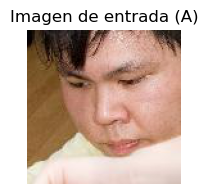

1/1 [==============================] - 0s 33ms/step
Predicción: [[9.999639e-01 3.608700e-05]]
Clase predicha: Hombre


In [23]:
img_path = '../data/imagenes/12494527693_0.jpg'
predict_gender('A', '../data/imagenes/2312469191_3.jpg')

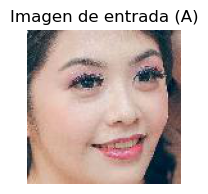

1/1 [==============================] - 0s 32ms/step
Predicción: [[5.6104348e-08 1.0000000e+00]]
Clase predicha: Mujer


In [24]:
predict_gender('A', '../data/imagenes/12494527693_0.jpg')

---

## TAREA 2.3:
 * Train one Gender Classifiers (previous Task 1.4) using images from all three ethnic groups.

De la misma manera que en el apartado anterior, vamos a a entrenar un modelo Clasificar de Género pero esta vez empleando 1000 embeddings de cada uno de los 3 grupos étnicos.


Primero, dividimos cada grupo de embeddings en un conjunto de train y otro de test haciendo uso de la función `generate_test_train`. Y acontinuación, entrenamos el modelo. 

In [11]:
x_train, x_test, y_train, y_test = generate_test_train(main_embeddings_dataset)

In [12]:
generic_model, accuracy, val_accuracy = train_gender_model(x_train, y_train, x_test, y_test) 
print(f"Generic model trained.")

Generic model trained.


---

## TAREA 2.4:
 * Evaluate the Gender Classifier (previous Task 2.3) using images from each of the three ethnic groups.
 * Evaluation: **3 test sets** x **1 models** = **3 accuracies**

In [13]:
get_all_accuracies_table({'generic': generic_model}, embeddings)

,Model generic
Dataset A,99.6667
Dataset B,99.6000
Dataset N,99.7333


hcaer un entrenamiento mixo, hacer un 80% una etnia y 20% otra, varias combinaciones

ROC CURVE
y_score: las distancias
y_true: etiquetas 


---

## TAREA 2.5 EXTRA (ES LA TAREA EXTRA ORIGINAL, TAL VEZ NO QUEREMOS USARLO Y QUEREMOS HACER LO QUE DIJO EL PROFE):
Entrenar por etnia para cada género. Cresr dos modelos, uno  para hombres y otro para mujeres 



In [ ]:
def get_X_y_etnias(embeddings_db):
    """
    Convierte un diccionario de embeddings en matrices X e y.
    Parámetros:
    - embeddings_db: dict, diccionario con claves que indican el grupo y valores con listas de embeddings.
 
    Retorna:
    - X: numpy array con los embeddings.
    - y: numpy array con las etiquetas de género (one-hot encoded).
    """
    X = []
    y = []
 
    for label, embeddings in embeddings_db.items():
        if label[1] == 'A': 
            etnia = 0 # asiatico
        elif label[1] == 'B':
            etnia = 1 # blanco
        else:
            etnia = 2 # negro
        for emb in embeddings:
            X.append(emb)
            y.append(etnia)
 
    X = np.array(X).astype(float)
    y = to_categorical(y)  # Convertir a one-hot encoding

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
 
    return X_train, X_test, y_train, y_test


def gender_model_etnias():
    model = Sequential([
        Dense(60, input_dim=2048, activation='relu'),
        Dense(3, activation='softmax')  # 3 clases: 3 etnias
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def entrenamiento_etnias(X_train, y_train, epocas=10, n_splits=10):
    # Crear el clasificador Keras
    estimator = KerasClassifier(build_fn=gender_model_etnias, epochs=epocas, batch_size=5, verbose=0)
    # Validación cruzada con 10 folds
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results= cross_val_score(estimator, X_train, y_train, cv=kfold, verbose=0)
    return estimator, results

In [ ]:
grupos_filtrados = ['HA4K_120', 'HB4K_120', 'HN4K_120']
embeddings_db_H = {k: v for k, v in embeddings_db_demographic_500.items() if k in grupos_filtrados}
X_train_H, X_test_H, y_train_H, y_test_H = get_X_y_etnias(embeddings_db_H)

estimator_H, results_H = entrenamiento_etnias(X_train_H, y_train_H, epocas, n_splits=5)
print("Accuracy del modelo de etnia, genero hombre: %.2f%% (%.2f%%)" % (results_H.mean()*100, results_A.std()*100))

In [ ]:
grupos_filtrados = ['MA4K_120', 'MB4K_120', 'MN4K_120']
embeddings_db_M = {k: v for k, v in embeddings_db_demographic_500.items() if k in grupos_filtrados}
X_train_M, X_test_M, y_train_M, y_test_M = get_X_y_etnias(embeddings_db_M)

estimator_M, results_M = entrenamiento_etnias(X_train_M, y_train_M, epocas, n_splits=5)
print("Accuracy del modelo de etnia, genero mujer: %.2f%% (%.2f%%)" % (results_M.mean()*100, results_A.std()*100))

In [ ]:
# TEST
# Entrenar modelo en el conjunto de entrenamiento completo
estimator_H.fit(X_train_H, y_train_H)
 
test_accuracy_HH = estimator_H.score(X_test_H, y_test_H)
print("Accuracy en test: %.2f%%" % (test_accuracy_AA * 100))

test_accuracy_HM = estimator_H.score(X_test_M, y_test_M)
print("Accuracy en test: %.2f%%" % (test_accuracy_AB * 100))

In [ ]:
estimator_M.fit(X_train_M, y_train_M)

test_accuracy_MM = estimator_M.score(X_test_M, y_test_M)
print("Accuracy en test: %.2f%%" % (test_accuracy_BB * 100))

test_accuracy_MH = estimator_M.score(X_test_H, y_test_H)
print("Accuracy en test: %.2f%%" % (test_accuracy_BA * 100))


In [ ]:
# tabla de 3x3 con las acuracies
valores_etnias = [
    [test_accuracy_HH, test_accuracy_HM],  # Fila Modelo H
    [test_accuracy_MH, test_accuracy_MM]   # Fila Modelo M
]


df = pd.DataFrame(valores_etnias, index=["Modelo H", "Modelo M"], columns=["Train H", "Train M"])


df_styled = df.style.background_gradient(cmap='Blues', low=0.1, high=0.2).set_caption("Tabla de Accuracies").format("{:.4f}").set_table_styles([{
                        'selector': 'table', 
                        'props': [('font-size', '20px'), ('width', '100%')]
                    }, {
                        'selector': 'th', 
                        'props': [('font-size', '20px'), ('text-align', 'center')]
                    }, {
                        'selector': 'td', 
                        'props': [('font-size', '16px'), ('text-align', 'center')]
                    }])
                    

df_styled